In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**DATA UNDERSTANDING**

To understand the data, first open each of the data sets to see what they contain. This will guide on what data sets to use for our EDA.The goal of any business is making profits so an ideal data set should have production budgets and revenue generated from the movies.

In [2]:
# This dataset doesn't have any information that will be useful for my analysis hence i won't use it
tmdb_df= pd.read_csv('tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# has gross revenues but no production budget therefore we cannot calculate profits
bom_df = pd.read_csv('bom.movie_gross.csv.gz')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
# won't be used, no useful information for our problem statement
df_movieinfo = pd.read_csv('rt.movie_info.tsv.gz', delimiter ='\t')
df_movieinfo.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
# a good dataset as it has production budget and the gross revenues
# lets explore it further
budget_df = pd.read_csv('tn.movie_budgets.csv.gz')
budget_df 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
# check for duplicates
budget_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [8]:
budget_df['movie'].value_counts()

King Kong                        3
Halloween                        3
Home                             3
Total Recall                     2
The Day the Earth Stood Still    2
                                ..
Deterrence                       1
Panic                            1
Training Day                     1
Valentine's Day                  1
Snowden                          1
Name: movie, Length: 5698, dtype: int64

I will check if there are any placeholders used in the movie column using the .unique() method

In [9]:
budget_df['movie'].unique()

array(['Avatar', 'Pirates of the Caribbean: On Stranger Tides',
       'Dark Phoenix', ..., 'Return to the Land of Wonders',
       'A Plague So Pleasant', 'My Date With Drew'], dtype=object)

The data doesn't seem to have any null values. The is however duplicated values in the movies column. The production budgets and gross revenues are however objects therefore we need to convert them to float for analysis. We further also need to remove the $ and , in the figures.
Then we will create a column for profits from the worldwide market


In [10]:
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [11]:
budget_df['worldwide_gross']= budget_df['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df['production_budget'] = budget_df['production_budget'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df['domestic_gross']= budget_df['domestic_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


For readability of the table, we can divide the figures by 1000000 and convert the to millions

In [12]:
budget_df['prod_budget_mil'] = (budget_df['production_budget'] / 1000000)
budget_df['dom_gross_mil']  = (budget_df['domestic_gross'] / 1000000)
budget_df['world_gross_mil'] = (budget_df['worldwide_gross'] / 1000000)
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_mil,dom_gross_mil,world_gross_mil
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,425.0,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,410.6,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,350.0,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,330.6,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,317.0,620.181382,1316.721747


In [13]:
# confirm if the columns are floats
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   prod_budget_mil    5782 non-null   float64
 7   dom_gross_mil      5782 non-null   float64
 8   world_gross_mil    5782 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 406.7+ KB


next we calculate the net revenue/profits for both domestic and worldwide markets

In [14]:
budget_df['dom_profits']= budget_df['dom_gross_mil']- budget_df['prod_budget_mil']
budget_df['world_profits'] = budget_df['world_gross_mil'] - budget_df['prod_budget_mil']
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,425.0000,760.507625,2776.345279,335.507625,2351.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,410.6000,241.063875,1045.663875,-169.536125,635.063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,350.0000,42.762350,149.762350,-307.237650,-200.237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,330.6000,459.005868,1403.013963,128.405868,1072.413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.0070,0.000000,0.000000,-0.007000,-0.007000
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,0.0060,0.048482,0.240495,0.042482,0.234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.0050,0.001338,0.001338,-0.003662,-0.003662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.0014,0.000000,0.000000,-0.001400,-0.001400


now that i have computed the columns i will need for my analysis, i will drop those that won't be needed in the next steps

In [15]:
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'prod_budget_mil', 'dom_gross_mil',
       'world_gross_mil', 'dom_profits', 'world_profits'],
      dtype='object')

In [16]:
budget_df = budget_df.drop(columns= ['production_budget','domestic_gross','worldwide_gross','id'])
budget_df

,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,"Dec 18, 2009",Avatar,425.0000,760.507625,2776.345279,335.507625,2351.345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,-169.536125,635.063875
2,"Jun 7, 2019",Dark Phoenix,350.0000,42.762350,149.762350,-307.237650,-200.237650
3,"May 1, 2015",Avengers: Age of Ultron,330.6000,459.005868,1403.013963,128.405868,1072.413963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000
5778,"Apr 2, 1999",Following,0.0060,0.048482,0.240495,0.042482,0.234495
5779,"Jul 13, 2005",Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662
5780,"Sep 29, 2015",A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400


In [17]:
budget_df.set_index('movie')

,release_date,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
movie,,,,,,
Avatar,"Dec 18, 2009",425.0000,760.507625,2776.345279,335.507625,2351.345279
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410.6000,241.063875,1045.663875,-169.536125,635.063875
Dark Phoenix,"Jun 7, 2019",350.0000,42.762350,149.762350,-307.237650,-200.237650
Avengers: Age of Ultron,"May 1, 2015",330.6000,459.005868,1403.013963,128.405868,1072.413963
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...
Red 11,"Dec 31, 2018",0.0070,0.000000,0.000000,-0.007000,-0.007000
Following,"Apr 2, 1999",0.0060,0.048482,0.240495,0.042482,0.234495
Return to the Land of Wonders,"Jul 13, 2005",0.0050,0.001338,0.001338,-0.003662,-0.003662


In [18]:
budget_df.describe()

,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,31.587757,41.873327,91.487461,10.285570,59.899704
std,41.812077,68.240597,174.719969,49.921366,146.088881
min,0.001100,0.000000,0.000000,-307.237650,-200.237650
25%,5.000000,1.429534,4.125415,-9.132757,-2.189071
50%,17.000000,17.225945,27.984448,-0.348776,8.550286
75%,40.000000,52.348662,97.645837,17.781444,60.968502
max,425.000000,936.662225,2776.345279,630.662225,2351.345279


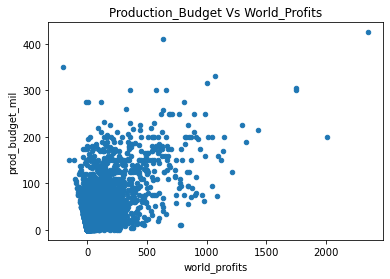

In [19]:
world_plot = budget_df.plot(kind ='scatter', x= 'world_profits', y= 'prod_budget_mil')
world_plot.set_title("Production_Budget Vs World_Profits");

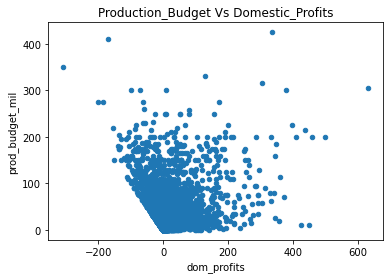

In [20]:
domestic_plot = budget_df.plot(kind ='scatter', x= 'dom_profits', y= 'prod_budget_mil');
domestic_plot.set_title("Production_Budget Vs Domestic_Profits");


In [23]:
! unzip -n zippedData/im.db.zip

unzip:  cannot find or open zippedData/im.db.zip, zippedData/im.db.zip.zip or zippedData/im.db.zip.ZIP.


In [21]:
conn = sqlite3.connect("imdb.zip")

In [22]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

DatabaseError: Execution failed on sql 'SELECT * FROM movie_basics;': file is not a database